In [6]:
import pandas as pd
import numpy as np

In [7]:
import os
print(os.path.exists('/content/train.csv'))  # Should return True

False


In [8]:
df = pd.read_csv('./data/train.csv', header=None, nrows=50000, on_bad_lines='skip', quoting=3)
df.columns = ['Review', 'Title', 'Text']
df.head(6)

,Review,Title,Text
0,"""2""","""Stuning even for the non-gamer""","""This sound track was beautiful! It paints the..."
1,"""1""","""sizes recomended in the size chart are not real""","""sizes are much smaller than what is recomende..."
2,"""1""","""Very Frustrating""","""My three year old son was very excited to get..."
3,"""2""","""Alaska sourdough""","""REad most of the book while visiting my broth..."
4,"""2""","""Good but received defective book""","""I bought this book because we are moving to G..."
5,"""1""","""Either 1 or 5 Stars. Depends on how you look ...","""Either 1 or 5 Stars. Depends on how you look ..."


In [9]:
df['Review'] = df['Review'].str.strip('"').astype('int8')

In [10]:
df.head(6)

,Review,Title,Text
0,2,"""Stuning even for the non-gamer""","""This sound track was beautiful! It paints the..."
1,1,"""sizes recomended in the size chart are not real""","""sizes are much smaller than what is recomende..."
2,1,"""Very Frustrating""","""My three year old son was very excited to get..."
3,2,"""Alaska sourdough""","""REad most of the book while visiting my broth..."
4,2,"""Good but received defective book""","""I bought this book because we are moving to G..."
5,1,"""Either 1 or 5 Stars. Depends on how you look ...","""Either 1 or 5 Stars. Depends on how you look ..."


In [11]:
df.shape

(50000, 3)

### **Step 1 - Remove punctuation marks and Convert to Lowercase**

In [12]:
# start = 50030    # to debug
# end = 50041

In [13]:
import re

# converting to a list and lowercase
# for i in range(len(df)):
#     df.loc[i, 'Title'] = re.sub('[^a-zA-Z]', ' ', str(df.loc[i, 'Title'])).lower()
#     df.loc[i, 'Text'] = re.sub('[^a-zA-Z]', ' ', str(df.loc[i, 'Text'])).lower()
df['Title'] = df['Title'].astype(str).apply(lambda x: re.sub('[^a-zA-Z]', ' ', x).lower())
df['Text'] = df['Text'].astype(str).apply(lambda x: re.sub('[^a-zA-Z]', ' ', x).lower())

In [14]:
df.head()

,Review,Title,Text
0,2,stuning even for the non gamer,this sound track was beautiful it paints the...
1,1,sizes recomended in the size chart are not real,sizes are much smaller than what is recomende...
2,1,very frustrating,my three year old son was very excited to get...
3,2,alaska sourdough,read most of the book while visiting my broth...
4,2,good but received defective book,i bought this book because we are moving to g...


### **Step 2 - Remove Stopwords and convet to list**

In [15]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/aum/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [16]:
from nltk.corpus import stopwords

notStopwords = ['not']          # 'not' is a stopword in this dataset
stopwords = {word for word in stopwords.words('english') if word not in notStopwords}

In [17]:
# # use Bagging

# for i in range(len(df)):
#     title:str = df['Title'].iloc[i]
#     text:str = df['Text'].iloc[i]

#     wordList = []
#     for word in title.split():
#         if word not in stopwords:
#             wordList.append(word)
#     df.at[i, 'Title'] = wordList

#     wordList = []
#     for word in text.split():
#         if word not in stopwords:
#             wordList.append(word)
#     df.at[i, 'Text'] = wordList
#     # print(type(title),'\n',type(text))

In [18]:
# use Bagging - above code cell does the same but it takes a lot of time as apply() of pandas is faster than for loop

def removeStopwordsAndConvertToArray(text):
    if isinstance(text,float):
        return []

    return [word for word in text.split() if word not in stopwords]

df['Title'] = df['Title'].astype(str).apply(removeStopwordsAndConvertToArray)
df['Text'] = df['Text'].astype(str).apply(removeStopwordsAndConvertToArray)

In [19]:
# df.iloc[start:end]

In [20]:
df.head()

,Review,Title,Text
0,2,"[stuning, even, non, gamer]","[sound, track, beautiful, paints, senery, mind..."
1,1,"[sizes, recomended, size, chart, not, real]","[sizes, much, smaller, recomended, chart, trie..."
2,1,[frustrating],"[three, year, old, son, excited, get, two, att..."
3,2,"[alaska, sourdough]","[read, book, visiting, brother, alaska, loved,..."
4,2,"[good, received, defective, book]","[bought, book, moving, germany, wanted, get, g..."


In [21]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0].astype('int8')

### **Step 3 - Stemming**

In [22]:
from nltk.stem.porter import PorterStemmer

In [23]:
ps = PorterStemmer()
myStemBag = [[], []]        # index 0->Title,1->Text

def stemming(x: list[str], index: int):
    shortBag = []
    for word in x:
        stem_word = ps.stem(word)
        if stem_word not in shortBag:
            shortBag.append(stem_word)

    myStemBag[index].append(shortBag)

X['Title'].apply(lambda x: stemming(x, 0))
X['Text'].apply(lambda x: stemming(x, 1))

# myStemBag

0        None
1        None
2        None
3        None
4        None
         ... 
49995    None
49996    None
49997    None
49998    None
49999    None
Name: Text, Length: 50000, dtype: object

In [24]:
X['Title'].apply(lambda x: ' '.join(x))
X['Text'].apply(lambda x: ' '.join(x))

0        sound track beautiful paints senery mind well ...
1        sizes much smaller recomended chart tried put ...
2        three year old son excited get two attempts pl...
3        read book visiting brother alaska loved going ...
4        bought book moving germany wanted get good ove...
                               ...                        
49995    old video tape version recorded many years ago...
49996    doesnt work blu ray player doesnt work dtv bra...
49997    unfortunately wound seeing christmas misgiving...
49998    love bowls look sharp versatile use hot cold f...
49999    tried find last year luck found german company...
Name: Text, Length: 50000, dtype: object

In [25]:
# X['Title'] = X['Title'].apply(lambda x: ' '.join(x))  # Convert list of list to list of string for count vectorizer
# X['Text'] = X['Text'].apply(lambda x: ' '.join(x))  # Convert list of list to list of string for count vectorizer

In [26]:
X.head()

,Title,Text
0,"[stuning, even, non, gamer]","[sound, track, beautiful, paints, senery, mind..."
1,"[sizes, recomended, size, chart, not, real]","[sizes, much, smaller, recomended, chart, trie..."
2,[frustrating],"[three, year, old, son, excited, get, two, att..."
3,"[alaska, sourdough]","[read, book, visiting, brother, alaska, loved,..."
4,"[good, received, defective, book]","[bought, book, moving, germany, wanted, get, g..."


In [27]:
y.head()

0    2
1    1
2    1
3    2
4    2
Name: Review, dtype: int8

In [28]:
X['Title'] = X['Title'].astype(str)
X['Text'] = X['Text'].astype(str)

In [29]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=5000)         # or else ram is crashed

X['Title'] = list(cv.fit_transform(X['Title']).toarray().astype(np.int8))
X['Text'] = list(cv.fit_transform(X['Text']).toarray().astype(np.int8))

In [30]:
X.shape,y.shape

((50000, 2), (50000,))

In [31]:
X.dtypes, y.dtypes

(Title    object
 Text     object
 dtype: object,
 dtype('int8'))

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

X_title = np.array(X['Title'].tolist())
X_text = np.array(X['Text'].tolist())

X_combined = np.hstack((X_title, X_text))

X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, stratify=y)

model = SVC()
model.fit(X_train, y_train)

In [ ]:
print('training accuracy: ', model.score(X_train, y_train))
print('testing accuracy: ', model.score(X_test, y_test))

training accuracy:  0.9869230769230769
testing accuracy:  0.8159509202453987


In [ ]:
X

,Title,Text
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...
1621,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1622,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1623,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1624,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


## **Trying k fold cross validation**

In [ ]:
from sklearn.model_selection import KFold,cross_val_score

k = 5
kf = KFold(n_splits=k, shuffle=True,random_state=42)

In [ ]:
X_title = np.array(X['Title'].tolist())
X_text = np.array(X['Text'].tolist())
X_combined = np.hstack((X_title, X_text))
X_combined

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int8)

In [ ]:
# we need X_combined as the cross_val_score requires a ndarray
cross_val_result:list = cross_val_score(SVC(), X_combined, y, cv=kf)

In [ ]:
print(f'Cross-Validation Results (Accuracy): {cross_val_result}')
print(f'Mean Accuracy: {cross_val_result.mean()}')

Cross-Validation Results (Accuracy): [0.76687117 0.80923077 0.76923077 0.78769231 0.81538462]
Mean Accuracy: 0.7896819254365266


## **Trying out ANN**

In [ ]:
import torch
from torch import nn
from torch import optim
from torch.utils.data import Dataset, DataLoader

In [ ]:
class TensorData(Dataset):
  def __init__(self, X, y):
    super(TensorData, self).__init__()
    self.X = torch.from_numpy(X.astype(np.float32))
    self.y = torch.from_numpy(y.astype(np.float32))

  def __getitem__(self, index):
    return self.X[index], self.y[index]

  def __len__(self):
    return self.X.shape[0]


In [ ]:
# TensorData(X_combined, y_train.to_numpy())[402], len(TensorData(X_combined, y_train.to_numpy()))

In [ ]:
y_prev = y    # just to store the prev structure of y

In [ ]:
y = (y_prev >= 4).astype(np.float32)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_combined, y.to_numpy(), test_size=0.2, stratify=y)

In [ ]:
batch_size = 64

train_data = TensorData(X_train, y_train)
train_dataloader = DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True, drop_last=True)

test_data = TensorData(X_test, y_test)
test_dataloader = DataLoader(dataset=test_data, batch_size=batch_size, shuffle=True, drop_last=True)

In [ ]:
X_combined.shape, y.shape

((1626, 6773), (1626,))

In [ ]:
input_dim = X_combined.shape[1]
hidden_dim = 10
output_dim = 1

class NeuralNetwork(nn.Module):
  def __init__(self, input_dim, hidden_dim, output_dim):
    super(NeuralNetwork, self).__init__()
    self.layer_1 = nn.Linear(in_features=input_dim, out_features=hidden_dim)
    self.layer_2 = nn.Linear(in_features=hidden_dim, out_features=output_dim)
    # self.relu = nn.ReLU()

  def forward(self, x):
    x = self.layer_1(x)
    # print("Layer 1 - ", x.shape)   # Layer 1 -  torch.Size([64, 10])
    x = nn.functional.relu(x)
    # print("Functional layer - ", x.shape)     # Functional layer -  torch.Size([64, 10])
    x = self.layer_2(x)
    # print("Last layer - ",x.shape)    # Last layer -  torch.Size([64, 1])
    x = nn.functional.sigmoid(x)

    return x

nnModel = NeuralNetwork(input_dim, hidden_dim, output_dim)
print(nnModel)

NeuralNetwork(
  (layer_1): Linear(in_features=6773, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=1, bias=True)
)


In [ ]:
learning_rate = 0.1
loss_fn = nn.BCELoss()
optimizer = optim.SGD(nnModel.parameters(), lr=learning_rate)

In [ ]:
num_epochs = 100
from statistics import mean
loss_values = []

nnModel.train()

for epoch in range(num_epochs):
  for X, y in train_dataloader:
    # zero the parameter gradients
    optimizer.zero_grad()
    # predict the value
    # forward + backward + optimize
    pred = nnModel(X)
    # calculate loss
    loss = loss_fn(pred, y.unsqueeze(-1))
    loss_values.append(loss.item())
    loss.backward()
    optimizer.step()

  print(f'Epoch: {epoch}, Loss: {mean(loss_values)}')

print('Training complete ')

Epoch: 0, Loss: 0.43984339833259584
Epoch: 1, Loss: 0.3493256255984306
Epoch: 2, Loss: 0.2890183337032795
Epoch: 3, Loss: 0.2454609210602939
Epoch: 4, Loss: 0.2125334008038044
Epoch: 5, Loss: 0.18690967733661334
Epoch: 6, Loss: 0.16653713315193142
Epoch: 7, Loss: 0.15003098538145423
Epoch: 8, Loss: 0.13642370272427798
Epoch: 9, Loss: 0.12505124723538757
Epoch: 10, Loss: 0.11540560111911459
Epoch: 11, Loss: 0.10713661099240805
Epoch: 12, Loss: 0.0999693844252481
Epoch: 13, Loss: 0.09370389726744699
Epoch: 14, Loss: 0.08818007171774904
Epoch: 15, Loss: 0.08327479368890636
Epoch: 16, Loss: 0.07889051339315141
Epoch: 17, Loss: 0.0749471588448311
Epoch: 18, Loss: 0.07138394410109246
Epoch: 19, Loss: 0.06814810942974873
Epoch: 20, Loss: 0.06519549446668299
Epoch: 21, Loss: 0.06249007220718671
Epoch: 22, Loss: 0.06000284176906976
Epoch: 23, Loss: 0.05770835541576768
Epoch: 24, Loss: 0.05558637468330562
Epoch: 25, Loss: 0.053616054099536715
Epoch: 26, Loss: 0.051782600632092605
Epoch: 27, Loss

In [ ]:
type(loss_values)

list

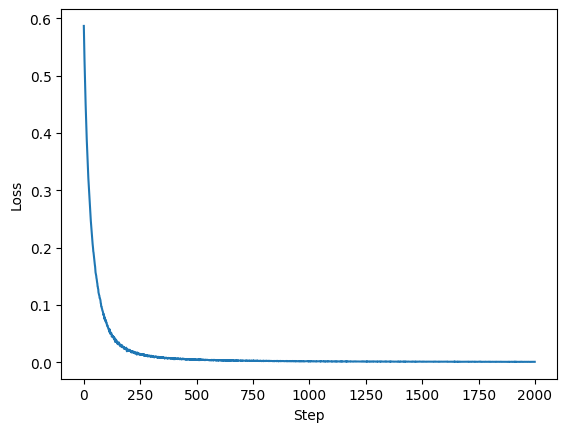

In [ ]:
import matplotlib.pyplot as plt

step = np.arange(len(loss_values))

fix, ax = plt.subplots()
ax.plot(step, np.array(loss_values))
ax.set_xlabel('Step')
ax.set_ylabel('Loss')
plt.show()

In [ ]:
with torch.inference_mode():
  total, correct = 0, 0

  for X, y in test_dataloader:
    outputs = nnModel(X)
    outputs = outputs.detach().cpu()
    predicted = np.where(outputs < 0.5, 0, 1)
    predicted = np.squeeze(predicted, axis=-1)
    print(y.size(0), "  ", y.shape[0])
    total += y.shape[0]
    correct += (predicted == y.numpy()).sum().item()

  print(f'Accuracy: {correct/total}')

64    64
64    64
64    64
64    64
64    64
Accuracy: 1.0


In [ ]:
# what is this above thing real i tried this thing but it was not correct prediction

In [ ]:
torch.save(nnModel.state_dict(), 'model.pth')